### Setup

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Nov 10 10:32:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [3]:
from IPython.display import clear_output
!pip install git+https://github.com/huggingface/diffusers.git@main
!pip install git+https://github.com/huggingface/accelerate.git
!pip install  --upgrade
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"
clear_output()

In [4]:
from google.colab import output
output.enable_custom_widget_manager()

In [5]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


### Import Libraries

In [21]:
import torch
import transformers
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    revision="fp16",
    torch_dtype=torch.float16,
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

CPU times: user 12.3 s, sys: 378 ms, total: 12.7 s
Wall time: 12.8 s


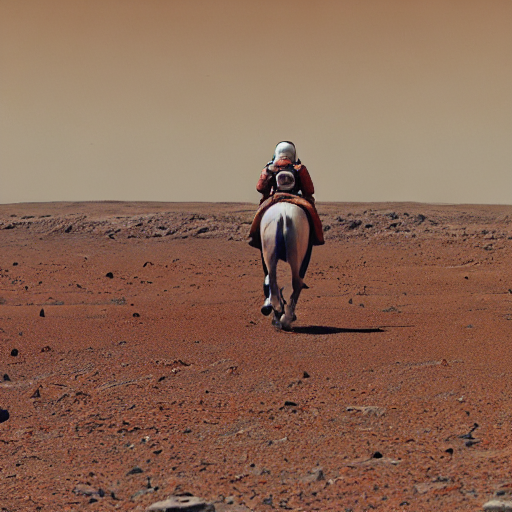

In [22]:
%%time

pipe = pipe.to("cuda")
prompt = "a photo of an astronaut riding a horse on mars"
# pipe.enable_sequential_cpu_offload()
pipe.enable_attention_slicing(1)

image = pipe(prompt).images[0]
image